In [1]:
from qiskit import *
# Warning: you need to have utils.py in the notebook working directory
# You can se it with !pwd and change it with !cd (or using os module)
%run utils.py

In [2]:
ufunc = QuantumCircuit(3)
ufunc.x(0)
ufunc.i(1)
ufunc.h(-1)
ufunc.ccx(0, 1, 2)
ufunc.x(0)
ufunc.i(1)
ufunc.h(-1)
measurer = QuantumCircuit(3)
measurer.measure_all()

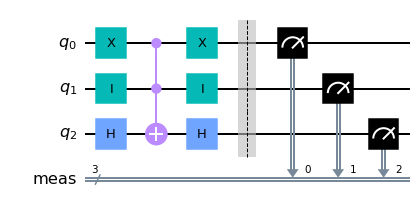

In [3]:
oracle = measurer.compose(ufunc, qubits=range(3), front=True)
oracle.draw("mpl")

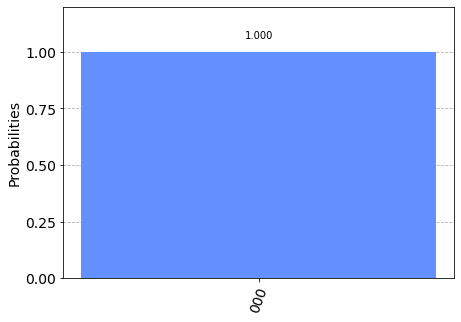

In [4]:
counts = simulate(oracle)
plot_histogram(counts)

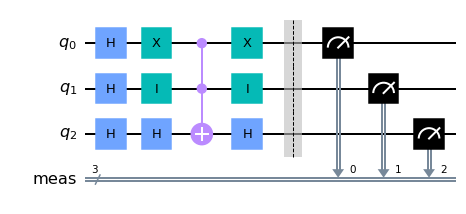

In [5]:
hadamard = QuantumCircuit(3)
hadamard.h(range(3))
oracle = oracle.compose(hadamard, qubits=range(3), front=True)
oracle.draw("mpl")

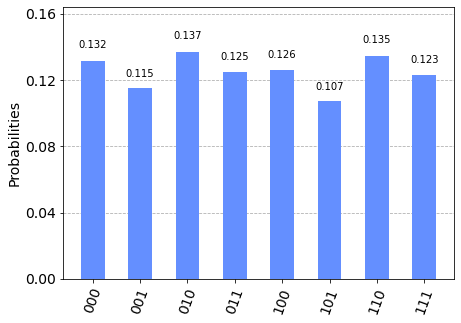

In [6]:
counts = simulate(oracle)
plot_histogram(counts)

In [7]:
diffuser = QuantumCircuit(3)
diffuser.h(range(3))
diffuser.x(range(3))
diffuser.h(-1)
diffuser.i(range(2))
diffuser.ccx(0, 1, 2)
diffuser.h(-1)
diffuser.i(range(2))
diffuser.x(range(3))
diffuser.h(range(3))

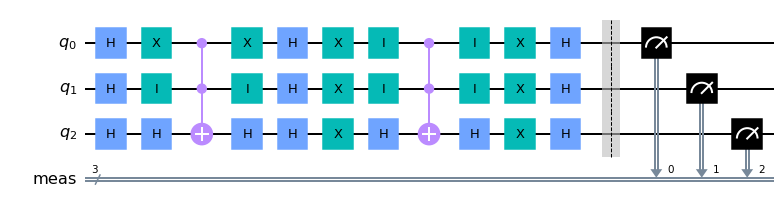

In [8]:
grover = hadamard.compose(ufunc, qubits=range(3))
grover = grover.compose(diffuser, qubits=range(3))
grover = measurer.compose(grover, qubits=range(3), front=True)
grover.draw("mpl")
# Uncomment this line to export the final circuit to latex
# to_pgf(grover, "2_bit.pgf")

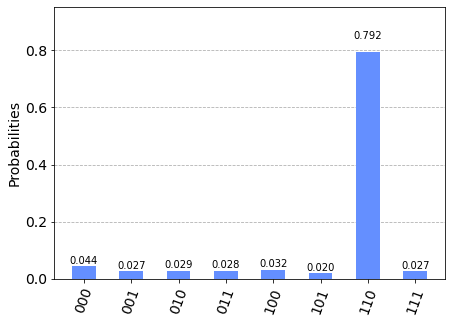

In [11]:
counts = simulate(grover)
plot_histogram(counts)
# In this simple exemple of two bit oracle, only one iteration is require
# In generalized form for n bits, 2^{n/2} iteration are required to get probability near zero